In [13]:
pip install opencv-python

Note: you may need to restart the kernel to use updated packages.


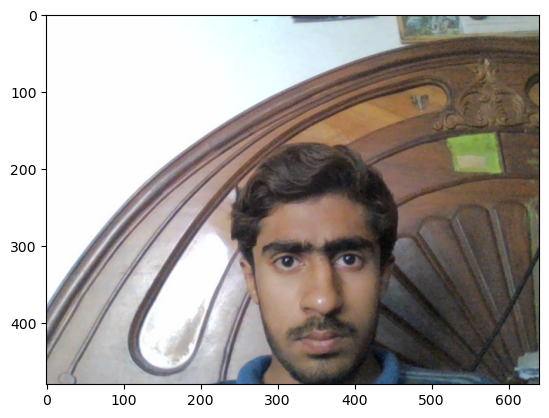

error: OpenCV(4.11.0) D:\a\opencv-python\opencv-python\opencv\modules\highgui\src\window.cpp:1367: error: (-2:Unspecified error) The function is not implemented. Rebuild the library with Windows, GTK+ 2.x or Cocoa support. If you are on Ubuntu or Debian, install libgtk2.0-dev and pkg-config, then re-run cmake or configure script in function 'cvWaitKey'


In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Start video capture from the default webcam
cap = cv2.VideoCapture(0)

# Define HSV range for the color to track (e.g., blue)
lower_color = np.array([100, 150, 0])
upper_color = np.array([140, 255, 255])

while True:
    ret, frame = cap.read()
    if not ret:
        break

    # Convert frame to HSV color space
    hsv = cv2.cvtColor(frame, cv2.COLOR_BGR2HSV)

    # Create a mask for the selected color
    mask = cv2.inRange(hsv, lower_color, upper_color)

    # Remove noise from the mask
    mask = cv2.erode(mask, None, iterations=2)
    mask = cv2.dilate(mask, None, iterations=2)

    # Find contours in the mask
    contours, _ = cv2.findContours(mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    for contour in contours:
        area = cv2.contourArea(contour)
        if area > 500:
            # Get the center of the contour and draw a circle
            (x, y), radius = cv2.minEnclosingCircle(contour)
            center = (int(x), int(y))
            radius = int(radius)

            cv2.circle(frame, center, radius, (0, 255, 0), 2)
            cv2.putText(frame, "Object", (center[0]-10, center[1]-10),
                        cv2.FONT_HERSHEY_SIMPLEX, 0.6, (0, 255, 0), 2)

    # Display the output
    cv2.imshow("Tracked Object", frame)

    # Exit on pressing 'q'
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

cap.release()
cv2.destroyAllWindows()